In [0]:
import time
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

random.seed(42)
np.random.seed(42)
tf.set_random_seed(42)

In [0]:
fashion_MNIST = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_MNIST.load_data()

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ",  X_test.shape)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


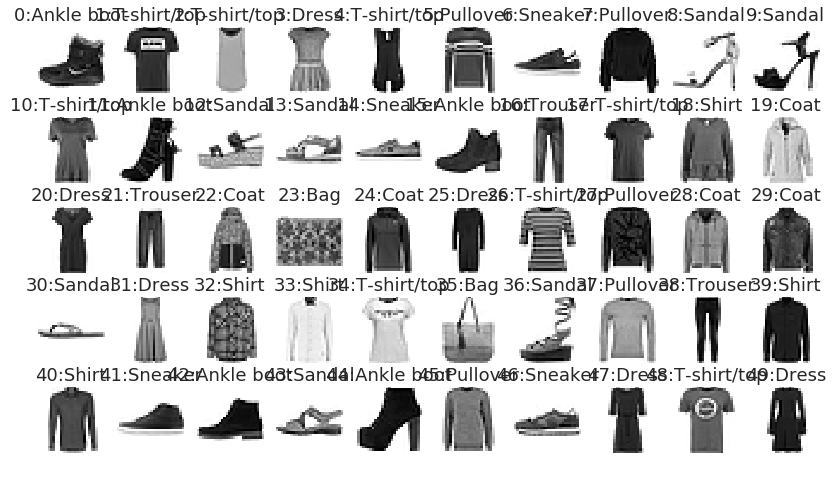

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # refer https://github.com/zalandoresearch/fashion-mnist

# displaying the fashion image
n_rows = 5
n_cols = 10

plt.figure(figsize=(n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(str(index)+ ":" + class_names[y_train[index]])

plt.show()


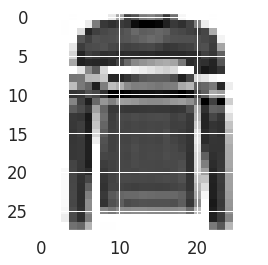

In [0]:
plt.imshow(X_train[5], cmap = 'binary')

In [0]:
y_train.shape

(60000,)

In [0]:
#scikit-learn expects 2d num arrays for the training dataset for a fit function. 
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1, 784)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ",  X_test.shape)

X_train.shape:  (60000, 784)
X_test.shape:  (10000, 784)


In [0]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)
print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 2.4247212409973145 seconds


In [0]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29039228 0.1775531  0.06019222 0.04957428]


In [0]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [0]:
type(y_train)

numpy.ndarray

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(60000,)


(<Figure size 576x576 with 1 Axes>,
 [Text(3.273042878289762, -2.711647376951183, '0'),
  Text(0.08188544898993602, -5.601998452486741, '1'),
  Text(4.23452715051722, 1.478907408928289, '2'),
  Text(1.2116518879710074, -4.363748416264375, '3'),
  Text(4.892196739890395, 1.1368204145358862, '4'),
  Text(-6.246365134652001, 0.3064240402595327, '5'),
  Text(2.591830548921258, -0.263391379059412, '6'),
  Text(-5.958804376556944, 1.3706349767177963, '7'),
  Text(0.18195815135046173, 3.8782723418737124, '8'),
  Text(-2.4691642670235563, 4.547582363830109, '9')])

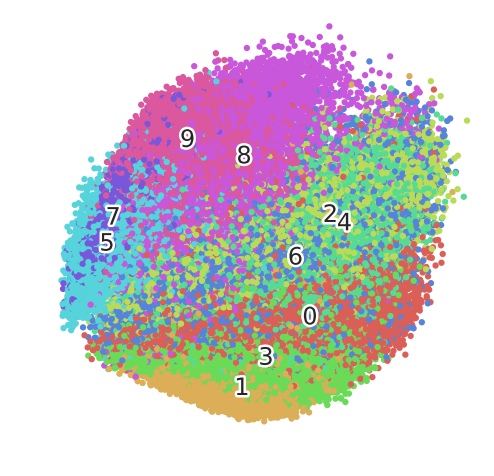

In [0]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

print(type(top_two_comp))
print(type(top_two_comp.values))

print(y_train.shape)

fashion_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

In [0]:
# from sklearn.manifold import TSNE
# import time
# time_start = time.time()

# fashion_tsne = TSNE(random_state=RS).fit_transform(X_train)

# print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [0]:
x_subset = X_train[0:2000]
y_subset = y_train[0:2000]

In [0]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=42).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 21.339959621429443 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(6.5105205, -27.483942, '0'),
  Text(-38.752113, -24.3271, '1'),
  Text(37.543564, -2.2940507, '2'),
  Text(-13.562784, -26.262909, '3'),
  Text(33.927937, -11.228262, '4'),
  Text(-5.7805414, 32.953865, '5'),
  Text(14.958915, -7.0177727, '6'),
  Text(-5.9540186, 50.26393, '7'),
  Text(25.622883, 25.331442, '8'),
  Text(-28.7247, 23.5941, '9')])

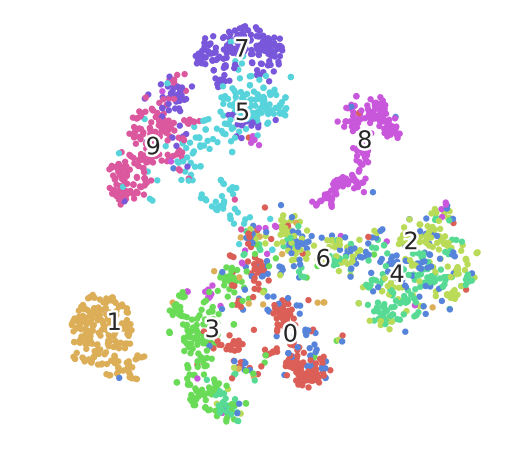

In [0]:
fashion_scatter(fashion_tsne, y_subset)